In [168]:
import pandas as pd
import numpy as np

import requests

import os
import time
import sys
import yaml

from data_loader import *
from utils import *

import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams.update({
    'axes.facecolor': '#1e1e1e',
    'figure.facecolor': '#1e1e1e',
    'axes.edgecolor': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'text.color': 'white',
    'axes.grid': True,
    'grid.color': 'gray'
})

pd.set_option("display.max_column",None)
print(os.getcwd())


%load_ext autoreload
%reload_ext autoreload
%autoreload 2


def auto_reload():
    %load_ext autoreload
    %reload_ext autoreload
    %autoreload 2

/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
with open("config.yaml",'r') as f:
    config = yaml.safe_load(f)


home_dir = config['HOME_DIRECTORY']
home_dir

'/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG'

# API Football:
https://www.api-football.com

![PYTHON LOGO](https://www.api-football.com/public/img/news/archi-beta.jpg)

In [41]:
leagues_dat = get_leagues(home_dir +"/data/Leagues/leagues.parquet")
leagues_dat[['league_id','league_name','country_name']]

,league_id,league_name,country_name
0,4,Euro Championship,World
1,21,Confederations Cup,World
2,61,Ligue 1,France
3,144,Jupiler Pro League,Belgium
4,71,Serie A,Brazil
...,...,...,...
1128,1131,Super Cup,Mongolia
1129,1132,AFC Challenge League,World
1130,1133,Goiano - 3,Brazil
1131,1001,CONCACAF Women U20,World


# Leagues subset:

In [42]:
# Configs
major_leagues = ["Premier League","La Liga","Serie A","Bundesliga","Eredivisie","Ligue 1"]
major_countries = ["England","Spain","Italy","Germany","Netherlands","France","Brazil"]
teams = ["Liverpool","Wolves"] # teams to pull players data of
seasons = [2022,2021,2023,2024] # seasons to pull players and teams stats of



leagues_subset = leagues_dat[leagues_dat.league_name.isin(major_leagues) & leagues_dat.country_name.isin(major_countries)] # league ID to pull from, current values: {39:premier league}, Add to dictionary as needed

In [43]:
leagues_subset

,seasons,league_id,league_name,league_type,league_logo,country_name,country_code,country_flag
2,"[{'coverage': {'fixtures': {'events': True, 'l...",61,Ligue 1,League,https://media.api-sports.io/football/leagues/6...,France,FR,https://media.api-sports.io/flags/fr.svg
4,"[{'coverage': {'fixtures': {'events': True, 'l...",71,Serie A,League,https://media.api-sports.io/football/leagues/7...,Brazil,BR,https://media.api-sports.io/flags/br.svg
5,"[{'coverage': {'fixtures': {'events': True, 'l...",39,Premier League,League,https://media.api-sports.io/football/leagues/3...,England,GB,https://media.api-sports.io/flags/gb.svg
6,"[{'coverage': {'fixtures': {'events': True, 'l...",78,Bundesliga,League,https://media.api-sports.io/football/leagues/7...,Germany,DE,https://media.api-sports.io/flags/de.svg
7,"[{'coverage': {'fixtures': {'events': True, 'l...",135,Serie A,League,https://media.api-sports.io/football/leagues/1...,Italy,IT,https://media.api-sports.io/flags/it.svg
8,"[{'coverage': {'fixtures': {'events': True, 'l...",88,Eredivisie,League,https://media.api-sports.io/football/leagues/8...,Netherlands,NL,https://media.api-sports.io/flags/nl.svg
10,"[{'coverage': {'fixtures': {'events': True, 'l...",140,La Liga,League,https://media.api-sports.io/football/leagues/1...,Spain,ES,https://media.api-sports.io/flags/es.svg


In [44]:
team = 'Liverpool'
season = 2024

In [45]:
liverpool_dat = read_fixtures_for_season(team,season)

Pulling for Liverpool,2024 with league_id: 39
<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40  Liverpool   
1  [{'player': {'id': 26232, 'name': 'Mark Flekke...       55  Brentford   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/55.png   

                 team.update  
0  2025-06-06T09:04:18+00:00  
1  2025-06-06T09:04:18+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40   
1  [{'player': {'id': 2919, 'name': 'Matz Sels', ...       65   

           team.name                                          team.logo  \
0          Liverpool  https://media.api-sports.io/football/teams/40.png   
1  Nottingham Forest  https://media.api-sports.io/football/teams/65.png   

                 team.update  
0  2025-06-06T09:04:36+00:00  
1  2025-06-06T09:04:36+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id    team.name  \
0  [{'player': {'id': 281, 'name': 'Caoimhin Kell...       40    Liverpool   
1  [{'player': {'id': 2273, 'name': 'Kepa Arrizab...       35  Bournemouth   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/35.png   

                 team.update  
0  2025-06-06T09:04:46+00:00  
1  2025-06-06T09:04:46+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 281, 'name': 'Caoimhin Kell...       40  Liverpool   
1  [{'player': {'id': 18959, 'name': 'Robert Sánc...       49    Chelsea   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/49.png   

                 team.update  
0  2025-06-06T09:05:22+00:00  
1  2025-06-06T09:05:22+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 281, 'name': 'Caoimhin Kell...       40  Liverpool   
1  [{'player': {'id': 129058, 'name': 'Bart Verbr...       51   Brighton   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/51.png   

                 team.update  
0  2025-06-06T09:05:43+00:00  
1  2025-06-06T09:05:43+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id    team.name  \
0  [{'player': {'id': 281, 'name': 'Caoimhin Kell...       40    Liverpool   
1  [{'player': {'id': 19599, 'name': 'Emiliano Ma...       66  Aston Villa   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/66.png   

                 team.update  
0  2025-06-06T09:05:51+00:00  
1  2025-06-06T09:05:51+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 281, 'name': 'Caoimhin Kell...       40   
1  [{'player': {'id': 25004, 'name': 'Stefan Orte...       50   

         team.name                                          team.logo  \
0        Liverpool  https://media.api-sports.io/football/teams/40.png   
1  Manchester City  https://media.api-sports.io/football/teams/50.png   

                 team.update  
0  2025-06-06T09:06:17+00:00  
1  2025-06-06T09:06:17+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40  Liverpool   
1  [{'player': {'id': 1438, 'name': 'Bernd Leno',...       36     Fulham   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/36.png   

                 team.update  
0  2025-06-06T09:06:48+00:00  
1  2025-06-06T09:06:48+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40  Liverpool   
1  [{'player': {'id': 152970, 'name': 'Jakub Stol...       46  Leicester   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/46.png   

                 team.update  
0  2025-06-06T09:07:12+00:00  
1  2025-06-06T09:07:12+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40   
1  [{'player': {'id': 526, 'name': 'André Onana',...       33   

           team.name                                          team.logo  \
0          Liverpool  https://media.api-sports.io/football/teams/40.png   
1  Manchester United  https://media.api-sports.io/football/teams/33.png   

                 team.update  
0  2025-06-06T09:07:28+00:00  
1  2025-06-06T09:07:28+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40  Liverpool   
1  [{'player': {'id': 19541, 'name': 'Christian W...       57    Ipswich   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/57.png   

                 team.update  
0  2025-06-06T09:08:06+00:00  
1  2025-06-06T09:08:06+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40  Liverpool   
1  [{'player': {'id': 1590, 'name': 'José Sá', 'p...       39     Wolves   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/39.png   

                 team.update  
0  2025-06-06T09:08:37+00:00  
1  2025-06-06T09:08:37+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40  Liverpool   
1  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34  Newcastle   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/34.png   

                 team.update  
0  2025-06-06T10:08:57+01:00  
1  2025-06-06T10:08:57+01:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id    team.name  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40    Liverpool   
1  [{'player': {'id': 20355, 'name': 'Aaron Ramsd...       41  Southampton   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/41.png   

                 team.update  
0  2025-06-06T09:09:06+00:00  
1  2025-06-06T09:09:07+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 281, 'name': 'Caoimhin Kell...       40  Liverpool   
1  [{'player': {'id': 2932, 'name': 'Jordan Pickf...       45    Everton   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/45.png   

                 team.update  
0  2025-06-06T09:09:42+00:00  
1  2025-06-06T09:09:42+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40  Liverpool   
1  [{'player': {'id': 253, 'name': 'Alphonse Aréo...       48   West Ham   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/48.png   

                 team.update  
0  2025-06-06T09:09:55+00:00  
1  2025-06-06T09:09:55+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40  Liverpool   
1  [{'player': {'id': 31354, 'name': 'Guglielmo V...       47  Tottenham   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/47.png   

                 team.update  
0  2025-06-06T09:10:29+00:00  
1  2025-06-06T09:10:29+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40  Liverpool   
1  [{'player': {'id': 19465, 'name': 'David Raya'...       42    Arsenal   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/42.png   

                 team.update  
0  2025-06-06T09:11:15+00:00  
1  2025-06-06T09:11:15+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id       team.name  \
0  [{'player': {'id': 280, 'name': 'Alisson', 'ph...       40       Liverpool   
1  [{'player': {'id': 19088, 'name': 'Dean Hender...       52  Crystal Palace   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/40.png   
1  https://media.api-sports.io/football/teams/52.png   

                 team.update  
0  2025-06-06T09:11:30+00:00  
1  2025-06-06T09:11:30+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

In [49]:
# Lets see how Hugo Ekitike compares:
eintract_dat = read_fixtures_for_season("Eintracht Frankfurt",2024)

Pulling for Eintracht Frankfurt,2024 with league_id: 78
<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 1800, 'name': 'Kevin Trapp'...      169   
1  [{'player': {'id': 702, 'name': 'Oliver Bauman...      167   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1      1899 Hoffenheim  https://media.api-sports.io/football/teams/167...   

                 team.update  
0  2025-05-28T04:07:14+00:00  
1  2025-05-28T04:07:14+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 362884, 'name': 'Kauã dos S...      169   
1  [{'player': {'id': 25626, 'name': 'Moritz Nico...      163   

                  team.name  \
0       Eintracht Frankfurt   
1  Borussia Mönchengladbach   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/169...   
1  https://media.api-sports.io/football/teams/163...   

                 team.update  
0  2025-05-28T05:07:37+01:00  
1  2025-05-28T05:07:37+01:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 362884, 'name': 'Kauã Santo...      169   
1  [{'player': {'id': 497, 'name': 'Manuel Neuer'...      157   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1       Bayern München  https://media.api-sports.io/football/teams/157...   

                 team.update  
0  2025-05-28T04:07:52+00:00  
1  2025-05-28T04:07:52+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 1800, 'name': 'Kevin Trapp'...      169   
1  [{'player': {'id': 26395, 'name': 'Patrick Dre...      176   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1           VfL Bochum  https://media.api-sports.io/football/teams/176...   

                 team.update  
0  2025-05-28T04:08:24+00:00  
1  2025-05-28T04:08:24+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 1800, 'name': 'Kevin Trapp'...      169   
1  [{'player': {'id': 7288, 'name': 'Michael Zett...      162   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1        Werder Bremen  https://media.api-sports.io/football/teams/162...   

                 team.update  
0  2025-05-28T04:08:52+00:00  
1  2025-05-28T04:08:52+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 1800, 'name': 'Kevin Trapp'...      169   
1  [{'player': {'id': 14553, 'name': 'Nediljko La...      170   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1          FC Augsburg  https://media.api-sports.io/football/teams/170...   

                 team.update  
0  2025-05-28T04:09:08+00:00  
1  2025-05-28T04:09:08+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 362884, 'name': 'Kauã Santo...      169   
1  [{'player': {'id': 25906, 'name': 'Robin Zentn...      164   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1         FSV Mainz 05  https://media.api-sports.io/football/teams/164...   

                 team.update  
0  2025-05-28T04:09:23+00:00  
1  2025-05-28T04:09:23+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 1800, 'name': 'Kevin Trapp'...      169   
1  [{'player': {'id': 178768, 'name': 'Noah Atubo...      160   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1          SC Freiburg  https://media.api-sports.io/football/teams/160...   

                 team.update  
0  2025-05-28T04:09:40+00:00  
1  2025-05-28T04:09:41+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 1800, 'name': 'Kevin Trapp'...      169   
1  [{'player': {'id': 25282, 'name': 'Gregor Kobe...      165   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1    Borussia Dortmund  https://media.api-sports.io/football/teams/165...   

                 team.update  
0  2025-05-28T04:09:51+00:00  
1  2025-05-28T04:09:51+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 1800, 'name': 'Kevin Trapp'...      169   
1  [{'player': {'id': 15573, 'name': 'Kamil Graba...      161   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1        VfL Wolfsburg  https://media.api-sports.io/football/teams/161...   

                 team.update  
0  2025-05-28T04:10:15+00:00  
1  2025-05-28T04:10:15+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 1800, 'name': 'Kevin Trapp'...      169   
1  [{'player': {'id': 40271, 'name': 'Thomas Dähn...      191   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1        Holstein Kiel  https://media.api-sports.io/football/teams/191...   

                 team.update  
0  2025-05-28T04:10:49+00:00  
1  2025-05-28T04:10:49+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 1800, 'name': 'Kevin Trapp'...      169   
1  [{'player': {'id': 963, 'name': 'Lukáš Hrádeck...      168   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1     Bayer Leverkusen  https://media.api-sports.io/football/teams/168...   

                 team.update  
0  2025-05-28T04:11:09+00:00  
1  2025-05-28T04:11:09+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 1800, 'name': 'Kevin Trapp'...      169   
1  [{'player': {'id': 1798, 'name': 'Frederik Røn...      182   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1         Union Berlin  https://media.api-sports.io/football/teams/182...   

                 team.update  
0  2025-05-28T05:11:29+01:00  
1  2025-05-28T05:11:29+01:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 362884, 'name': 'Kauã Santo...      169   
1  [{'player': {'id': 399, 'name': 'Alexander Nüb...      172   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1        VfB Stuttgart  https://media.api-sports.io/football/teams/172...   

                 team.update  
0  2025-05-28T04:11:48+00:00  
1  2025-05-28T04:11:48+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 362884, 'name': 'Kauã Santo...      169   
1  [{'player': {'id': 24893, 'name': 'Kevin Mülle...      180   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1     1. FC Heidenheim  https://media.api-sports.io/football/teams/180...   

                 team.update  
0  2025-05-28T05:12:08+01:00  
1  2025-05-28T05:12:08+01:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 1800, 'name': 'Kevin Trapp'...      169   
1  [{'player': {'id': 1924, 'name': 'Maarten Vand...      173   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1           RB Leipzig  https://media.api-sports.io/football/teams/173...   

                 team.update  
0  2025-05-28T04:12:31+00:00  
1  2025-05-28T04:12:31+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 1800, 'name': 'Kevin Trapp'...      169   
1  [{'player': {'id': 119167, 'name': 'Ben Voll',...      186   

             team.name                                          team.logo  \
0  Eintracht Frankfurt  https://media.api-sports.io/football/teams/169...   
1         FC St. Pauli  https://media.api-sports.io/football/teams/186...   

                 team.update  
0  2025-05-28T04:12:53+00:00  
1  2025-05-28T04:12:53+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

In [58]:
ekitike_dat = eintract_dat[eintract_dat.player_name == 'Hugo Ekitiké']
ekitike_dat.head()

,player_id,player_name,offsides,games_minutes,games_number,games_position,games_rating,games_captain,games_substitute,shots_total,shots_on,goals_total,goals_conceded,goals_assists,goals_saves,passes_total,passes_key,passes_accuracy,tackles_total,tackles_blocks,tackles_interceptions,duels_total,duels_won,dribbles_attempts,dribbles_success,dribbles_past,fouls_drawn,fouls_committed,cards_yellow,cards_red,penalty_won,penalty_commited,penalty_scored,penalty_missed,penalty_saved,fixture_id,team_goals_scored,team_non_penalty_goals_scored,team_goals_scored_half,team_goals_conceded,team_non_penalty_goals_conceded,team_goals_conceded_half,opponent,team_winner,team,outcome,dribble_success_rate,target_shot_conversion_perc,duels_won_perc,pass_accuracy_perc
9,174565,Hugo Ekitiké,NaN,65.0,11,F,8.3,False,False,2.0,1.0,1.0,0,1.0,NaN,26.0,5.0,24,1.0,NaN,1.0,15.0,5.0,7.0,2.0,NaN,NaN,1.0,0,0,NaN,NaN,0,0,NaN,1223987,3,3,2,1,1,0,1899 Hoffenheim,Eintracht Frankfurt,Eintracht Frankfurt,win,28.571429,100.0,33.333333,92.307692
9,174565,Hugo Ekitiké,NaN,78.0,11,F,6.3,False,False,3.0,1.0,NaN,0,0.0,NaN,18.0,1.0,12,1.0,NaN,1.0,12.0,6.0,6.0,2.0,NaN,2.0,NaN,0,0,NaN,NaN,0,0,NaN,1224004,2,2,1,0,0,0,Borussia Mönchengladbach,Eintracht Frankfurt,Eintracht Frankfurt,win,33.333333,NaN,50.000000,66.666667
9,174565,Hugo Ekitiké,2.0,66.0,11,F,7.2,False,False,3.0,2.0,1.0,0,0.0,NaN,15.0,NaN,11,NaN,NaN,1.0,8.0,4.0,5.0,2.0,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,1224022,3,3,2,3,3,2,Bayern München,Draw,Eintracht Frankfurt,draw,40.000000,50.0,50.000000,73.333333
9,174565,Hugo Ekitiké,NaN,90.0,11,F,8,False,False,2.0,2.0,2.0,0,0.0,NaN,22.0,NaN,15,NaN,NaN,NaN,9.0,2.0,3.0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,0,NaN,1224050,7,7,4,2,2,1,VfL Bochum,Eintracht Frankfurt,Eintracht Frankfurt,win,NaN,100.0,22.222222,68.181818
9,174565,Hugo Ekitiké,1.0,89.0,11,F,7.7,False,False,1.0,1.0,NaN,0,1.0,NaN,23.0,3.0,19,NaN,NaN,NaN,10.0,6.0,3.0,3.0,NaN,1.0,1.0,0,0,NaN,NaN,0,0,NaN,1224069,1,1,1,0,0,0,Werder Bremen,Eintracht Frankfurt,Eintracht Frankfurt,win,100.000000,NaN,60.000000,82.608696


In [53]:
find_team("Newcast")

,team_name,league
1,Newcastle,39
1,Newcastle,39


In [54]:
newcastle_dat = read_fixtures_for_season("Newcastle",2024)

Pulling for Newcastle,2024 with league_id: 39
<Response [200]>
                                             players  team.id    team.name  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34    Newcastle   
1  [{'player': {'id': 18935, 'name': 'Alex McCart...       41  Southampton   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/41.png   

                 team.update  
0  2025-06-06T09:04:09+00:00  
1  2025-06-06T09:04:09+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34  Newcastle   
1  [{'player': {'id': 31354, 'name': 'Guglielmo V...       47  Tottenham   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/47.png   

                 team.update  
0  2025-06-06T09:04:28+00:00  
1  2025-06-06T09:04:29+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34   
1  [{'player': {'id': 617, 'name': 'Ederson', 'ph...       50   

         team.name                                          team.logo  \
0        Newcastle  https://media.api-sports.io/football/teams/34.png   
1  Manchester City  https://media.api-sports.io/football/teams/50.png   

                 team.update  
0  2025-06-06T09:04:54+00:00  
1  2025-06-06T09:04:54+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34  Newcastle   
1  [{'player': {'id': 129058, 'name': 'Bart Verbr...       51   Brighton   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/51.png   

                 team.update  
0  2025-06-06T09:05:23+00:00  
1  2025-06-06T09:05:23+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34  Newcastle   
1  [{'player': {'id': 19465, 'name': 'David Raya'...       42    Arsenal   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/42.png   

                 team.update  
0  2025-06-06T09:05:44+00:00  
1  2025-06-06T09:05:44+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34  Newcastle   
1  [{'player': {'id': 2997, 'name': 'Łukasz Fabia...       48   West Ham   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/48.png   

                 team.update  
0  2025-06-06T09:06:13+00:00  
1  2025-06-06T09:06:13+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34  Newcastle   
1  [{'player': {'id': 281, 'name': 'Caoimhin Kell...       40  Liverpool   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/40.png   

                 team.update  
0  2025-06-06T09:06:31+00:00  
1  2025-06-06T09:06:31+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 18886, 'name': 'Martin Dúbr...       34  Newcastle   
1  [{'player': {'id': 15870, 'name': 'Mads Herman...       46  Leicester   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/46.png   

                 team.update  
0  2025-06-06T09:06:50+00:00  
1  2025-06-06T09:06:50+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id    team.name  \
0  [{'player': {'id': 18886, 'name': 'Martin Dúbr...       34    Newcastle   
1  [{'player': {'id': 19599, 'name': 'Emiliano Ma...       66  Aston Villa   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/66.png   

                 team.update  
0  2025-06-06T06:07:13-03:00  
1  2025-06-06T06:07:13-03:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 18886, 'name': 'Martin Dúbr...       34  Newcastle   
1  [{'player': {'id': 1590, 'name': 'José Sá', 'p...       39     Wolves   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/39.png   

                 team.update  
0  2025-06-06T09:07:44+00:00  
1  2025-06-06T09:07:44+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id    team.name  \
0  [{'player': {'id': 18886, 'name': 'Martin Dúbr...       34    Newcastle   
1  [{'player': {'id': 2273, 'name': 'Kepa Arrizab...       35  Bournemouth   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/35.png   

                 team.update  
0  2025-06-06T09:07:54+00:00  
1  2025-06-06T09:07:54+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 18886, 'name': 'Martin Dúbr...       34  Newcastle   
1  [{'player': {'id': 1438, 'name': 'Bernd Leno',...       36     Fulham   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/36.png   

                 team.update  
0  2025-06-06T09:08:23+00:00  
1  2025-06-06T09:08:24+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34   
1  [{'player': {'id': 2919, 'name': 'Matz Sels', ...       65   

           team.name                                          team.logo  \
0          Newcastle  https://media.api-sports.io/football/teams/34.png   
1  Nottingham Forest  https://media.api-sports.io/football/teams/65.png   

                 team.update  
0  2025-06-06T09:08:49+00:00  
1  2025-06-06T09:08:49+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34  Newcastle   
1  [{'player': {'id': 26232, 'name': 'Mark Flekke...       55  Brentford   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/55.png   

                 team.update  
0  2025-06-06T09:09:38+00:00  
1  2025-06-06T09:09:38+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34   
1  [{'player': {'id': 50132, 'name': 'Altay Bayın...       33   

           team.name                                          team.logo  \
0          Newcastle  https://media.api-sports.io/football/teams/34.png   
1  Manchester United  https://media.api-sports.io/football/teams/33.png   

                 team.update  
0  2025-06-06T09:09:56+00:00  
1  2025-06-06T09:09:56+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id       team.name  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34       Newcastle   
1  [{'player': {'id': 19088, 'name': 'Dean Hender...       52  Crystal Palace   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/52.png   

                 team.update  
0  2025-06-06T09:09:26+00:00  
1  2025-06-06T09:09:26+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34  Newcastle   
1  [{'player': {'id': 82097, 'name': 'Alex Palmer...       57    Ipswich   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/57.png   

                 team.update  
0  2025-06-06T09:10:42+00:00  
1  2025-06-06T09:10:42+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34  Newcastle   
1  [{'player': {'id': 18959, 'name': 'Robert Sánc...       49    Chelsea   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/49.png   

                 team.update  
0  2025-06-06T09:11:16+00:00  
1  2025-06-06T09:11:16+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34  Newcastle   
1  [{'player': {'id': 2932, 'name': 'Jordan Pickf...       45    Everton   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/34.png   
1  https://media.api-sports.io/football/teams/45.png   

                 team.update  
0  2025-06-06T09:11:31+00:00  
1  2025-06-06T09:11:31+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

In [55]:
isak_dat = newcastle_dat[newcastle_dat.player_name.str.contains("Isa")]

In [57]:
# Comparitive analysis. Ekitike vs Isak vs Liverpool

In [ ]:
# Check Sesko
rb_leipzip_dat = read_fixtures_for_season("RB Leipzig",2024)

In [181]:
striker_dat = pd.concat([liverpool_dat[liverpool_dat.games_position.isin(['F','M'])],ekitike_dat,isak_dat,rb_leipzip_dat[rb_leipzip_dat.player_name == 'Benjamin Šeško']],axis = 0)

In [182]:
attacking_stat_cols = ['shots_total', 'shots_on', 'goals_total', 'goals_assists','duels_total', 'duels_won', 'dribbles_attempts', 'dribbles_success','fouls_drawn','dribble_success_rate',
       'target_shot_conversion_perc', 'duels_won_perc', 'pass_accuracy_perc']
attacking_stat_cols

['shots_total',
 'shots_on',
 'goals_total',
 'goals_assists',
 'duels_total',
 'duels_won',
 'dribbles_attempts',
 'dribbles_success',
 'fouls_drawn',
 'dribble_success_rate',
 'target_shot_conversion_perc',
 'duels_won_perc',
 'pass_accuracy_perc']

In [ ]:
# quick knn clustering
from sklearn.cluster import KMeans

# who is ekitike most similar to 
dribble_comparison_dat = striker_dat[['games_position','player_name'] + attacking_stat_cols].fillna(0)
avg_dribble_success = dribble_comparison_dat[dribble_comparison_dat.games_position.isin(['F','M'])].groupby(['player_name']).agg(n_games = ('player_name','size'),
                                                                          avg_dribble_success = ('dribble_success_rate','mean'),
                                                                          std_dribble_success = ('dribble_success_rate','std'),
                                                                          avg_target_shot_cr = ('target_shot_conversion_perc','mean'),
                                                                          std_target_shot_cr = ('target_shot_conversion_perc','std'),
                                                                          avg_duels_cr = ('duels_won_perc','mean'),
                                                                          std_duels_cr = ('duels_won_perc','std'),
                                                                          avg_pass_accuracy = ('pass_accuracy_perc','mean'),
                                                                          std_pass_accuracy = ('pass_accuracy_perc','std')
                                                                          )


In [ ]:
avg_dribble_success.sort_values('avg_dribble_success',ascending=False)

,n_games,avg_dribble_success,std_dribble_success,avg_target_shot_cr,std_target_shot_cr,avg_duels_cr,std_duels_cr,avg_pass_accuracy,std_pass_accuracy
player_name,,,,,,,,,
Cody Gakpo,35,49.047619,44.591988,20.952381,38.633280,48.282931,28.048221,80.634988,16.779126
Ryan Gravenberch,37,46.589447,41.327724,0.000000,0.000000,58.058113,18.151921,88.960562,4.601186
Hugo Ekitiké,33,43.953824,29.855801,27.272727,39.046398,38.717689,17.122807,76.437333,11.904650
Benjamin Šeško,33,43.448118,35.289555,28.282828,41.349805,49.744306,20.755658,70.842583,14.719283
Mohamed Salah,38,43.027455,31.231097,46.710526,42.338701,40.605589,15.629022,73.656026,8.614981
Luis Díaz,38,40.526316,39.030043,18.157895,33.519277,33.601727,21.359956,78.295224,24.817372
Dominik Szoboszlai,36,36.342593,43.831965,12.500000,30.178043,40.654554,21.053886,85.985462,6.068311
Alexander Isak,34,31.633987,32.182706,40.490196,43.547508,30.394312,18.399077,77.207479,8.420399
Curtis Jones,32,21.354167,37.682501,6.250000,21.060588,50.951705,30.214123,89.210428,18.166342


In [ ]:
# among 18 players, size 3 uniform clusters
km = KMeans(6,random_state= 5)
avg_dribble_success['cluster_dribble'] = km.fit_predict(avg_dribble_success[['avg_dribble_success']])

km = KMeans(6,random_state= 5)
avg_dribble_success['cluster_shot_cr'] = km.fit_predict(avg_dribble_success[['avg_target_shot_cr']])

km = KMeans(6,random_state= 5)
avg_dribble_success['cluster_duels'] = km.fit_predict(avg_dribble_success[['avg_duels_cr']])

km = KMeans(6,random_state= 5)
avg_dribble_success['cluster_pass'] = km.fit_predict(avg_dribble_success[['avg_pass_accuracy']])

In [ ]:
# check by clusters:
avg_dribble_success.sort_values(["avg_target_shot_cr","cluster_shot_cr"],ascending= [0,0])[["avg_target_shot_cr","std_target_shot_cr","cluster_shot_cr"]].head(7)

,avg_target_shot_cr,std_target_shot_cr,cluster_shot_cr
player_name,,,
Mohamed Salah,46.710526,42.338701,1
Alexander Isak,40.490196,43.547508,1
Hugo Ekitiké,27.272727,39.046398,4
Cody Gakpo,20.952381,38.633280,2
Luis Díaz,18.157895,33.519277,2
Diogo Jota,16.666667,35.634832,2
Alexis Mac Allister,12.857143,32.860796,5


In [ ]:
avg_dribble_success.sort_values(["avg_dribble_success","cluster_dribble"],ascending= [0,0])[["avg_dribble_success","std_dribble_success","cluster_dribble"]].head(7)

,avg_dribble_success,std_dribble_success,cluster_dribble
player_name,,,
Cody Gakpo,49.047619,44.591988,5
Ryan Gravenberch,46.589447,41.327724,5
Hugo Ekitiké,43.953824,29.855801,2
Mohamed Salah,43.027455,31.231097,2
Luis Díaz,40.526316,39.030043,2
Dominik Szoboszlai,36.342593,43.831965,3
Alexander Isak,31.633987,32.182706,3


In [ ]:
avg_dribble_success.sort_values(["avg_dribble_success","cluster_dribble"],ascending= [0,0])[["avg_dribble_success","std_dribble_success","cluster_dribble"]].head(7)

/var/folders/x2/4jp5z9p56hd1r0cvzk8fb0200000gn/T/ipykernel_4202/2789689912.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


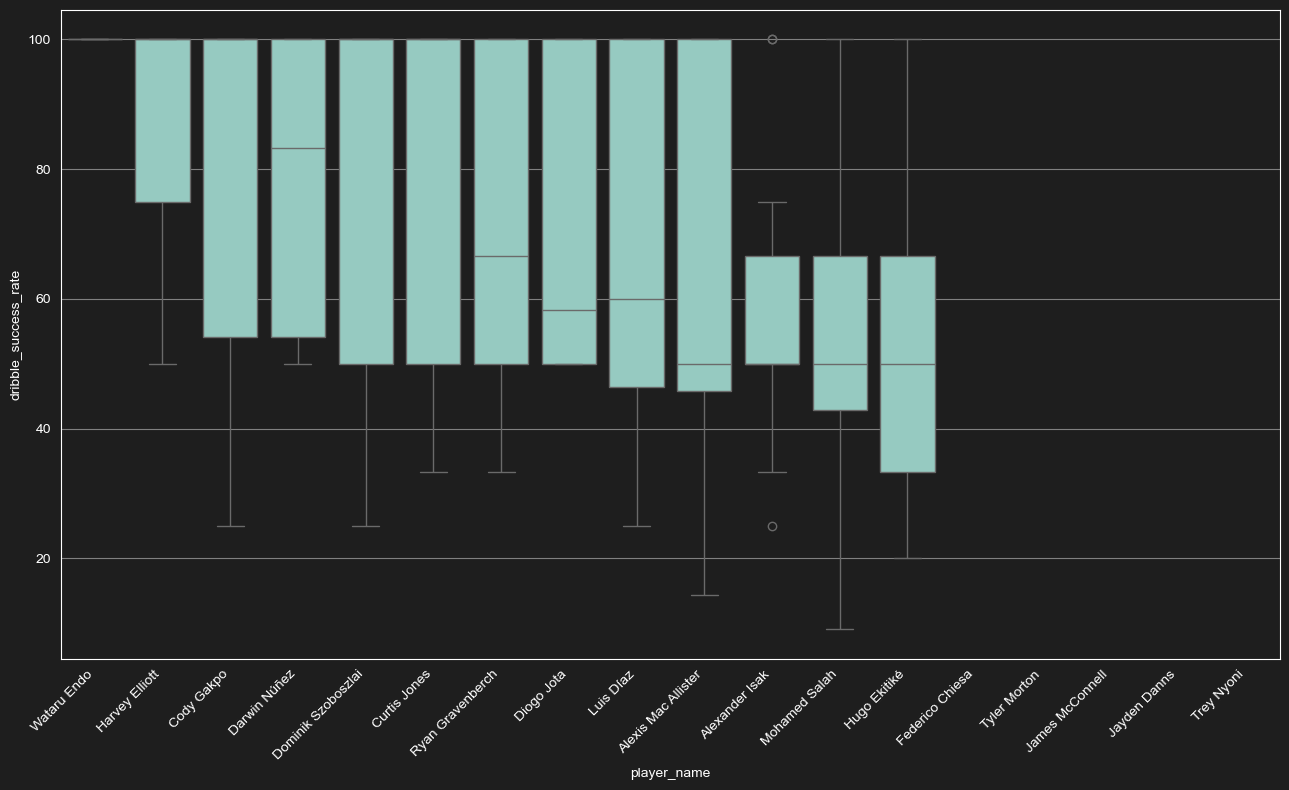

In [177]:
dribble_dat = striker_dat[striker_dat.games_position.isin(['F','M'])].reset_index()

dribble_dat_g = dribble_dat.groupby("player_name")['dribble_success_rate'].mean().reset_index()
dribble_dat_g['rank'] = dribble_dat_g['dribble_success_rate'].fillna(0).rank(ascending= False, method = 'dense')
dribble_dat_g.sort_values("rank",inplace = True)

fig, ax = plt.subplots(figsize=(13, 8))

# Plot correctly, no comma here
sns.boxplot(
    data=dribble_dat,
    x="player_name",
    y="dribble_success_rate",
    order=dribble_dat_g['player_name'],
    ax=ax
)

# Now this works correctly on `ax`
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [185]:
find_team("Arsen")

,team_name,league
7,Arsenal,39
6,Arsenal,39


In [ ]:
# Check Sesko
arsenal_dat = read_fixtures_for_season("Arsenal",2024)

Pulling for Arsenal,2024 with league_id: 39
<Response [200]>
                                             players  team.id team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42   Arsenal   
1  [{'player': {'id': 1590, 'name': 'José Sá', 'p...       39    Wolves   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/39.png   

                 team.update  
0  2025-06-06T09:04:08+00:00  
1  2025-06-06T09:04:08+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42   Arsenal   
1  [{'player': {'id': 129058, 'name': 'Bart Verbr...       51  Brighton   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/51.png   

                 team.update  
0  2025-06-06T09:04:23+00:00  
1  2025-06-06T09:04:23+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42    Arsenal   
1  [{'player': {'id': 15870, 'name': 'Mads Herman...       46  Leicester   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/46.png   

                 team.update  
0  2025-06-06T09:04:50+00:00  
1  2025-06-06T09:04:50+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id    team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42      Arsenal   
1  [{'player': {'id': 20355, 'name': 'Aaron Ramsd...       41  Southampton   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/41.png   

                 team.update  
0  2025-06-06T09:04:56+00:00  
1  2025-06-06T09:04:56+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42    Arsenal   
1  [{'player': {'id': 281, 'name': 'Caoimhin Kell...       40  Liverpool   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/40.png   

                 team.update  
0  2025-06-06T09:05:28+00:00  
1  2025-06-06T09:05:28+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42   
1  [{'player': {'id': 2919, 'name': 'Matz Sels', ...       65   

           team.name                                          team.logo  \
0            Arsenal  https://media.api-sports.io/football/teams/42.png   
1  Nottingham Forest  https://media.api-sports.io/football/teams/65.png   

                 team.update  
0  2025-06-06T09:06:07+00:00  
1  2025-06-06T09:06:07+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42   
1  [{'player': {'id': 526, 'name': 'André Onana',...       33   

           team.name                                          team.logo  \
0            Arsenal  https://media.api-sports.io/football/teams/42.png   
1  Manchester United  https://media.api-sports.io/football/teams/33.png   

                 team.update  
0  2025-06-06T09:06:22+00:00  
1  2025-06-06T09:06:22+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42   Arsenal   
1  [{'player': {'id': 2932, 'name': 'Jordan Pickf...       45   Everton   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/45.png   

                 team.update  
0  2025-06-06T09:06:45+00:00  
1  2025-06-06T09:06:45+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42   Arsenal   
1  [{'player': {'id': 616, 'name': 'Arijanet Muri...       57   Ipswich   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/57.png   

                 team.update  
0  2025-06-06T09:07:10+00:00  
1  2025-06-06T09:07:10+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42    Arsenal   
1  [{'player': {'id': 265826, 'name': 'Antonín Ki...       47  Tottenham   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/47.png   

                 team.update  
0  2025-06-06T09:07:36+00:00  
1  2025-06-06T09:07:36+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id    team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42      Arsenal   
1  [{'player': {'id': 19599, 'name': 'Emiliano Ma...       66  Aston Villa   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/66.png   

                 team.update  
0  2025-06-06T09:07:49+00:00  
1  2025-06-06T09:07:49+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42   
1  [{'player': {'id': 25004, 'name': 'Stefan Orte...       50   

         team.name                                          team.logo  \
0          Arsenal  https://media.api-sports.io/football/teams/42.png   
1  Manchester City  https://media.api-sports.io/football/teams/50.png   

                 team.update  
0  2025-06-06T09:08:16+00:00  
1  2025-06-06T09:08:16+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42   Arsenal   
1  [{'player': {'id': 253, 'name': 'Alphonse Aréo...       48  West Ham   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/48.png   

                 team.update  
0  2025-06-06T09:08:43+00:00  
1  2025-06-06T09:08:43+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42   Arsenal   
1  [{'player': {'id': 18959, 'name': 'Robert Sánc...       49   Chelsea   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/49.png   

                 team.update  
0  2025-06-06T09:09:15+00:00  
1  2025-06-06T09:09:15+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42   Arsenal   
1  [{'player': {'id': 1438, 'name': 'Bernd Leno',...       36    Fulham   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/36.png   

                 team.update  
0  2025-06-06T09:09:33+00:00  
1  2025-06-06T09:09:33+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42    Arsenal   
1  [{'player': {'id': 26232, 'name': 'Mark Flekke...       55  Brentford   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/55.png   

                 team.update  
0  2025-06-06T09:09:50+00:00  
1  2025-06-06T09:09:51+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id       team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42         Arsenal   
1  [{'player': {'id': 19088, 'name': 'Dean Hender...       52  Crystal Palace   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/52.png   

                 team.update  
0  2025-06-06T09:10:26+00:00  
1  2025-06-06T09:10:26+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id    team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42      Arsenal   
1  [{'player': {'id': 2273, 'name': 'Kepa Arrizab...       35  Bournemouth   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/35.png   

                 team.update  
0  2025-06-06T09:10:50+00:00  
1  2025-06-06T09:10:50+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>
                                             players  team.id  team.name  \
0  [{'player': {'id': 19465, 'name': 'David Raya'...       42    Arsenal   
1  [{'player': {'id': 18911, 'name': 'Nick Pope',...       34  Newcastle   

                                           team.logo  \
0  https://media.api-sports.io/football/teams/42.png   
1  https://media.api-sports.io/football/teams/34.png   

                 team.update  
0  2025-06-06T09:11:21+00:00  
1  2025-06-06T09:11:21+00:00  


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:104: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_home'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_home'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:107: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals

<Response [200]>


/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals_scored'] = fixtures[(fixtures.fixture_id == fixture)]['goals_away'].values[0] - fixtures[(fixtures.fixture_id == fixture)]['score_penalty_away'].fillna(0).values[0]
/Users/echhitjoshi/Library/Mobile Documents/com~apple~CloudDocs/Work/overperformXG/app/data_loader.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fixture_dat_expanded['team_non_penalty_goals